In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Tensors and Matrix multiplication
> Basics of Pytorch Tensors and optimizing matrix multiplication

## Pytorch Tensors

The Pytorch tensor is our basic unit. Everything we build here will be used to manipulate them in some way. 

Its a container for data with lots of special properties and methods. 

In [2]:
#export

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'

import torch
from torch import tensor
import graphviz
import os



import pandas as pd
import operator
from fastai import datasets
import gzip 
import pickle



os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [3]:
a = tensor([[1,2,3],[4,5,6]])
b = tensor([[2,3],[2,3],[2,3]])

In [4]:
a.dtype

torch.int64

In [5]:
a

tensor([[1, 2, 3],
        [4, 5, 6]])

### In-place and Out of place

In [6]:
x = torch.randn((3,3))
y = torch.randn((3,3))

Many of the builtin tensor operations can be used either "in-place" or "out-of-place".

For instance, `add` can be used "out-of-place" and will return the result of `x` and `y`

In [7]:
x

tensor([[ 0.6981,  1.0940,  0.8663],
        [-0.6059, -0.1173,  0.1646],
        [ 0.1974, -1.0907, -0.3347]])

In [8]:
x.add(y)

tensor([[-0.6588,  0.7516,  1.8528],
        [-1.0909,  0.9755, -0.8306],
        [-0.1146,  0.0945,  0.7107]])

But `x` has not been altered. 

In [9]:
x

tensor([[ 0.6981,  1.0940,  0.8663],
        [-0.6059, -0.1173,  0.1646],
        [ 0.1974, -1.0907, -0.3347]])

If on the other hand we use `add_`, `y` is added to `x` "in-place" and now x is the result of `y` and `x`

In [10]:
x.add_(y)

tensor([[-0.6588,  0.7516,  1.8528],
        [-1.0909,  0.9755, -0.8306],
        [-0.1146,  0.0945,  0.7107]])

In [11]:
x

tensor([[-0.6588,  0.7516,  1.8528],
        [-1.0909,  0.9755, -0.8306],
        [-0.1146,  0.0945,  0.7107]])

### Elementwise Operations

__Elementwise Addition and Subtraction__

In the above example `add` is an elementwise operation: every element of `x` is added to its corresponding row and column unit in `y`.

<p>
$$ y + x = \begin{bmatrix} x_1 & x_2 & x_3 \\ x_4 & x_5 & x_6 \\ x_7 & x_8 & x_9 \end{bmatrix} + \begin{bmatrix} y_1 & y_2 & y_3 \\ y_4 & y_5 & y_6 \\ y_7 & y_8 & y_9 \end{bmatrix} = \begin{bmatrix} x_1 + y_1 & x_2 + y_2 & x_3 + y_3 \\  x_4 + y_4 & x_5 + y_5 & x_6 + y_6 \\ x_7 + y_7 & x_8 + y_8 & x_9 + y_9 \end{bmatrix} $$
</p>


The two tensors must be the same shape and the resulting matrix will be the same shape as well

In [12]:
x + y 

tensor([[-2.0157,  0.4092,  2.8393],
        [-1.5759,  2.0684, -1.8258],
        [-0.4266,  1.2796,  1.7560]])

In [13]:
x - y

tensor([[ 0.6981,  1.0940,  0.8663],
        [-0.6059, -0.1173,  0.1646],
        [ 0.1974, -1.0907, -0.3347]])

__Elementwise Product__

<p>
$$ \vec{a} \circ \vec{b} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} \circ \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ b_4 \end{bmatrix} = \begin{bmatrix} a_1 \times b_1 \\ a_2 \times b_2 \\ a_3 \times b_3 \\ a_4 \times b_4 \end{bmatrix} $$
</p>


In [14]:
a1 = torch.randn((3))
b1 = torch.randn((3))
a1,b1

(tensor([ 1.9428, -1.2248, -1.2885]), tensor([-1.8645, -1.1418, -1.1597]))

In [15]:
a1 * b1

tensor([-3.6222,  1.3985,  1.4943])

And again we can do this in place with the method `mul_`

In [16]:
a1.mul_(b1); a1

tensor([-3.6222,  1.3985,  1.4943])

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

In [17]:
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [18]:
a > 0

tensor([[True, True, True],
        [True, True, True]])

Even though `a` is a 2x3 matrix the zero is broadcasted and then compared with each element in `a`

This happens whenever we try to do an operation between a matrix and a scalar:

In [19]:
a + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [20]:
a * 2

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

Broadcasting also works between a vector and matrix:

In [21]:
a[0] * a

tensor([[ 1,  4,  9],
        [ 4, 10, 18]])

### Tensor Rank and Shape

And if we reshape `a` to make it a column vector with three rows we can then broadcast it over `b`

In [22]:
a[0].unsqueeze(-1), b

(tensor([[1],
         [2],
         [3]]),
 tensor([[2, 3],
         [2, 3],
         [2, 3]]))

In [23]:
(a[0].unsqueeze(-1) * b)

tensor([[2, 3],
        [4, 6],
        [6, 9]])

### CUDA Tensors

The most important aspect of Tensors is that Pytorch has designed them to run on the GPU which results in significant speed.

Normally when we create a tensor the CPU will handle any operations done it.

In [24]:
b = torch.full((10,), 3)
print(b)

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])


In [25]:
b.device

device(type='cpu')

But if we specify the device we can run it on the GPU:

In [26]:
if torch.cuda.is_available():
    a = torch.full((10,), 3, device=torch.device("cuda"))
    print(a)
  

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')


## Data

First, we need some sort of data. We'll be using the <a href="http://yann.lecun.com/exdb/mnist/"> MNIST dataset </a>. A classic. 

The goal of the MNIST dataset is to predict the digit based on a handwritten grayscale image. Its a multiclass or multinomial classification problem. 

Each image is 28 x 28 pixels. And they only have 1 channel.


In [27]:
#export
def test(a, b, comp, cname=None):
    if cname is None: cname = comp.__name__
    assert comp(a,b), f"{cname}: \n{a} \b{b}"

def test_eq(a,b): 
    test(a,b, operator.eq, "==")

In [28]:
TEST = 'test'

test_eq(TEST, 'test')

In [29]:
MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

path = datasets.download_data(MNIST_URL, ext='.gz')

The Fastai datasets library makes it simple to download and save it locally.

In [30]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

The training and validation sets are Numpy arrays.

In [31]:
type(x_train)

numpy.ndarray

The training set has 50,000 rows (examples) and each row has 784 features or 28x28 pixels

In [32]:
x_train.shape

(50000, 784)

A single row is a vector of values between 0 and 1 representing individual grayscale pixel values.

In [33]:
x_train[1, 450:500]

array([0.      , 0.      , 0.      , 0.      , 0.332031, 0.984375, 0.898438, 0.097656, 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.027344, 0.527344, 0.988281, 0.726562, 0.046875, 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.332031,
       0.984375, 0.871094, 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.027344,
       0.511719, 0.984375, 0.878906, 0.277344, 0.      , 0.      ], dtype=float32)

We can represent it by throwing a row into a pandas dataframe and using background gradients to differientate the pixel values.

In [34]:
n_img = x_train[1].reshape(28,28)
df = pd.DataFrame(n_img[4:26,5:26])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199219,0.621094,0.988281,0.621094,0.195312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.929688,0.984375,0.984375,0.984375,0.925781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210938,0.886719,0.988281,0.984375,0.933594,0.910156,0.984375,0.222656,0.023438,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039062,0.234375,0.875000,0.984375,0.988281,0.984375,0.789062,0.328125,0.984375,0.988281,0.476562,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.636719,0.984375,0.984375,0.984375,0.988281,0.984375,0.984375,0.375000,0.738281,0.988281,0.652344,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.199219,0.929688,0.988281,0.988281,0.742188,0.445312,0.988281,0.890625,0.183594,0.308594,0.996094,0.656250,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.187500,0.929688,0.984375,0.984375,0.699219,0.046875,0.292969,0.472656,0.082031,0.000000,0.000000,0.988281,0.949219,0.195312,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.148438,0.644531,0.988281,0.910156,0.812500,0.328125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.988281,0.984375,0.644531,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.027344,0.695312,0.984375,0.937500,0.277344,0.074219,0.109375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.988281,0.984375,0.761719,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.222656,0.984375,0.984375,0.246094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.988281,0.984375,0.761719,0.000000,0.000000,0.000000


For Pytorch its necessary to convert the Numpy arrays into Tensors.

In [35]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [36]:
x_train[0][:20]
r,c = x_train.shape

Each image has a corresponding y value - an integer between 0 and 9.

In [37]:
y_train

tensor([5, 0, 4,  ..., 8, 4, 8])

In [38]:
y_train.shape, y_train.min(), y_train.max()

(torch.Size([50000]), tensor(0), tensor(9))

In [39]:
assert r==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

We can view the first training example by reshaping it into a 28x28 matrix and using `plt.imshow`

In [40]:
img = x_train[0].view(28,28)
img.view(28,28).type()

'torch.FloatTensor'

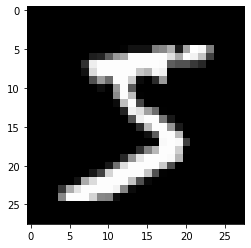

In [41]:
plt.imshow(img)

## Matrix Multiplication

The backbone of deep learning is matrix multiplication. 

A matrix multiplication is a linear combination of the rows of some matrix, $X$ here, and the columns of a second matrix, $W$. 

Its "linear" because we are only multplying and adding - not exponents or anything fancy. 

<p> 
$$ \begin{bmatrix} x_1 & x_2 & x_3  \\ x_4 & x_5 & x_6  \\ x_7 & x_8 & x_9 \end{bmatrix} \cdot \begin{bmatrix} w_1 & w_2 \\  w_3 & w_4 \\ w_5 & w_6\end{bmatrix} + \begin{bmatrix} b_1 \\  b_2 \\ b_3 \end{bmatrix} = \begin{bmatrix} a_1 & a_2 \\a_3 & a_4 \\ a_5 & a_6\end{bmatrix} $$
</p>
    
The $b$ vector is the bias. We'll discuss that at a later point. 

For now its enough to imagine this fancy "neural network" being a box that takes inputs does some matrix multplication on them and outputs a prediction.

In [42]:
#export
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

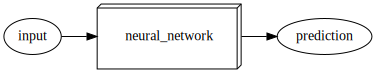

In [43]:
gv('''neural_network[shape=box3d width=2 height=0.9]
input->neural_network->prediction''')

### Matrix Multiplication v1

Now we'll start by writing a matrix multiplication function from scratch in pure Python.

In [44]:
def matmul(a,b):
    """Basic Matrix Multiplication in pure python"""
    ar,ac = a.shape # num of rows x num of cols
    br,bc = b.shape
    assert ac==br # assert that there are the same number of columns in a as rows in b
    c = torch.zeros(ar,bc) # initialize empty matrix for result
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c

We'll test that it works on a toy example:
<p>
$$ \begin{bmatrix} 1 & 2 & 3  \\ 4 &5 &6\end{bmatrix} \cdot \begin{bmatrix} 2 & 3 \\2 & 3\\2 & 3\end{bmatrix} = \begin{bmatrix} 12 & 18\\30 & 45\end{bmatrix} $$
</p>

In [45]:
a = tensor([[1,2,3],[4,5,6]])
b = tensor([[2,3],[2,3], [2,3]])

matmul(a,b)

tensor([[12., 18.],
        [30., 45.]])

Okay, it works. But since this is such a core operation of deep learning, repeatedly used in every neural network often with millions of parameters, we need it to be fast - very fast. 

Let's make some matrices of random numbers as weights and use a few of our MNIST examples. 

In [46]:
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [47]:
weights, bias

(tensor([[-1.7747,  1.1246,  0.0494,  ...,  0.3312,  1.1700, -0.5437],
         [ 0.4733,  1.7568, -0.5510,  ..., -1.0462, -0.8708,  0.8382],
         [-0.4069,  0.1494, -1.0096,  ..., -1.4336,  0.3325, -0.3415],
         ...,
         [-2.0761, -1.4836,  1.1158,  ..., -1.3155,  1.1339, -0.1648],
         [ 1.4378,  0.2523, -0.1588,  ..., -1.3448,  1.4248, -0.9081],
         [ 0.7327,  1.9936, -1.5039,  ..., -0.8908,  0.8055, -2.2542]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [48]:
m1 = x_valid[:5]
m2 = weights

In [49]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

We'll use the builtin magic command `%time`: 

"The CPU and wall clock times are printed, and the value of the expression (if any) is returned."

In [50]:
%time t1 = matmul(m1,m2)

Wall time: 779 ms


For this rather small matrix multplication the pure python implementation took roughly 1 second. 

We'll need to speed this up significantly.

In [51]:
t1.shape # output shape

torch.Size([5, 10])

### Matrix Multiplication v2: Elementwise

The most obvious tweak we can make to the v1 is instead of multiplying and adding each element we can multiply rows and columns elementwise and then sum the results. 

In [52]:
def matmul(a,b):
    """Elmentwise matrix multiplication in pure python"""
    ar,ac = a.shape # num of rows x num of cols
    br,bc = b.shape
    assert ac==br # assert that there are the same number of columns in a as rows in b
    c = torch.zeros(ar,bc) # initialize empty matrix for result
    for i in range(ar):
        for k in range(bc):
            c[i,k] = (a[i,:] * b[:,k]).sum()
    return c

In [53]:
matmul(a,b)

tensor([[12., 18.],
        [30., 45.]])

Again it works now let's see if how much that improved the speed. 

In [54]:
%timeit -n 10 _= matmul(m1,m2)

1.08 ms ± 29 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
795 / 1.21

657.0247933884298

Wow. Simply utliziing elementwise multiplication and Pytorch `sum` improved the speed by 600x

Let's create a quick test make sure our answers are (nearly) identical.

In [56]:
#export
def near(a,b): 
    """Test if two tensors are nearly identical"""
    return torch.allclose(a,b, rtol=1e-03, atol=1e-05)

def test_near(a,b): 
    test(a,b, near)

In [57]:
test_near(matmul(m1, m2), t1)

### Matrix Multiplication v3: Broadcasting

Another way is to broadcast a row of `a` over `b`. 

If we reshape each row of `a` to be a column vector we get:

In [58]:
a[0].unsqueeze(-1)

tensor([[1],
        [2],
        [3]])

Now that can be broadcast over `b` and we'll do an elementwise multiplication:

In [59]:
a[0].unsqueeze(-1) * b

tensor([[2, 3],
        [4, 6],
        [6, 9]])

We can also use `None` to reshape `a` into a column vector.

In [60]:
a[0, ..., None] * b

tensor([[2, 3],
        [4, 6],
        [6, 9]])

We just need to sum over the columns:

In [61]:
(a[0].unsqueeze(-1) * b).sum(dim=0)

tensor([12, 18])

And that gives us our first row of the product of `a` and `b`. 

We just need to iterate over each row of `a` and do this broadcast/elementwise operation. 

In [62]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros((ar, bc))
    for i in range(ar):
        c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)  
    return c 

In [63]:
matmul(a,b)

tensor([[12., 18.],
        [30., 45.]])

In [64]:
%timeit -n 10 _=matmul(m1, m2)

280 µs ± 7.15 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


By eliminating one of the loops and relying on broadcasting it's about 4 times faster than just doing elementwise multiplication.

In [65]:
(795*1000) / 263

3022.813688212928

We're about 3000x faster than python now. 

In [66]:
test_near(t1, matmul(m1, m2))

### Matrix Multiplication v4: Einstein Summation

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

In [67]:
def matmul(a,b): 
    return torch.einsum('ik,kj->ij', a, b)

In [68]:
%timeit -n 10 _=matmul(m1, m2)

39.5 µs ± 9.61 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


It's even faster than v3... but the fundamentals are Pytorch. 

### Matrix Multiplication: Pytorch

Now we'll use Pytorch's matrix multiplication function. 

Pytorch pushes the computation to a BLAS library called MKL (Math Kernel Library)

In [69]:
torch.__config__.show()

'PyTorch built with:\n  - MSVC 191125547\n  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications\n  - OpenMP 200203\n  - CUDA Runtime 10.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37,code=compute_37\n  - CuDNN 7.5.1\n  - Magma 2.5.1\n  - Build settings: BLAS=MKL, BUILD_NAMEDTENSOR=OFF, BUILD_TYPE=Release, CXX_FLAGS=/DWIN32 /D_WINDOWS  /GR  /w /EHa /MP /bigobj -openmp, DISABLE_NUMA=1, PERF_WITH_AVX=1, PERF_WITH_AVX2=1, USE_CUDA=ON, USE_EXCEPTION_PTR=1, USE_GFLAGS=OFF, USE_GLOG=OFF, USE_MKL=ON, USE_MKLDNN=OFF, USE_MPI=OFF, USE_NCCL=OFF, USE_NNPACK=OFF, USE_OPENMP=ON, USE_STATIC_DISPATCH=OFF, \n'

And its fast....

In [70]:
%timeit -n 10 t2 = m1.matmul(m2)

6.28 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Compared to the triple loop pure python implementation Pytorch is 44,000 times faster!

In [71]:
(795*1000) /18

44166.666666666664

In [72]:
t2 = m1@m2

In [73]:
test_near(t1, t2)

## '@'

The `@` operater allows us to do vector-matrix operations, as well as matrix multiplications.

In [74]:
a = torch.randint(1,9, (3,))
b = torch.randint(1,9, (3,3)); a,b

(tensor([2, 6, 1]),
 tensor([[8, 8, 6],
         [4, 4, 8],
         [6, 1, 7]]))

In [75]:
a@b

tensor([46, 41, 67])

In [76]:
b@a

tensor([70, 40, 25])

In [77]:
!python notebook2script.py 01_tensors_matmul.ipynb

Converted 01_tensors_matmul.ipynb to exp\nb_01.py
